In this note book we will take a look at the stock market S&P 500, using the data S&P 500 from 2018 to 2022

Importing Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

Data
Using data from S&P 500 Historical Data 2018 to 2022

In [80]:
df = pd.read_csv("./S&P 500 Futures Historical Data.csv")

In [81]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/03/2022,"4,786.00","4,771.00","4,791.25","4,747.50",1.32M,0.58%
1,12/31/2021,"4,758.50","4,773.75","4,778.50","4,750.50",954.08K,-0.29%
2,12/30/2021,"4,772.25","4,784.75","4,799.75","4,767.25",753.94K,-0.26%
3,12/29/2021,"4,784.50","4,781.00","4,796.00","4,770.00",876.03K,0.13%
4,12/28/2021,"4,778.50","4,780.50","4,798.00","4,770.50",954.52K,-0.08%


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1066 non-null   object
 1   Price     1066 non-null   object
 2   Open      1066 non-null   object
 3   High      1066 non-null   object
 4   Low       1066 non-null   object
 5   Vol.      1013 non-null   object
 6   Change %  1066 non-null   object
dtypes: object(7)
memory usage: 58.4+ KB


remove some of the NaN value row in Volume column

In [83]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 0 to 1064
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1013 non-null   object
 1   Price     1013 non-null   object
 2   Open      1013 non-null   object
 3   High      1013 non-null   object
 4   Low       1013 non-null   object
 5   Vol.      1013 non-null   object
 6   Change %  1013 non-null   object
dtypes: object(7)
memory usage: 63.3+ KB


convert number data from string to float

In [84]:
# convert million, billion, thousand into number
def converter(x):
  if 'M' in x:
    return float(x.strip('M'))*1000000
  elif 'B' in x:
    return float(x.strip('B'))*1000000000
  elif 'K' in x:
    return float(x.strip('K'))*100000

# convert string percentage to number percentage
def p2f(x):
  if '%' in x:
    return float(x.strip('%'))/100


In [85]:
df['Vol.'] = df['Vol.'].apply(converter)

In [86]:
df['Change %'] = df['Change %'].apply(p2f)

In [87]:
df['Price'] = df['Price'].str.replace(',','').astype(float)
df['Open'] = df['Open'].str.replace(',','').astype(float)
df['High'] = df['High'].str.replace(',','').astype(float)
df['Low'] = df['Low'].str.replace(',','').astype(float)

adding close column with the opening data starting from date 2, and remove the last row

In [88]:
df['Close'] = df['Open']
df['Close'] = df['Close'].shift(-1)
df = df.drop(df.index[-1])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 1063
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1012 non-null   object 
 1   Price     1012 non-null   float64
 2   Open      1012 non-null   float64
 3   High      1012 non-null   float64
 4   Low       1012 non-null   float64
 5   Vol.      1012 non-null   float64
 6   Change %  1012 non-null   float64
 7   Close     1012 non-null   float64
dtypes: float64(7), object(1)
memory usage: 71.2+ KB


In [90]:
df.describe()

,Price,Open,High,Low,Vol.,Change %,Close
count,1012.00,1012.00,1012.00,1012.00,1012.00,1012.00,1012.00
mean,3292.38,3289.53,3314.14,3264.85,11693219.37,0.00,3287.46
std,640.32,639.93,639.57,640.62,26955704.23,0.01,638.53
min,2220.50,2220.25,2386.00,2174.00,603000.00,-0.10,2220.25
25%,2796.94,2798.12,2817.25,2776.31,1290000.00,-0.00,2796.69
50%,3006.75,3005.62,3022.12,2987.88,1620000.00,0.00,3004.62
75%,3745.38,3738.62,3777.06,3709.44,2310000.00,0.01,3732.06
max,4786.00,4784.75,4799.75,4770.50,99978000.00,0.10,4784.75


In [91]:
df.shape

(1012, 8)

In [92]:
# save new data to file
df.to_csv('S&P 500 Enhanced Futures Historical Data.csv', index=False)

EDA S&P 500 2018 - 2021

In [93]:
df = pd.read_csv("./S&P 500 Enhanced Futures Historical Data.csv", parse_dates=['Date'])
df = df.iloc[1: , :]
df = df.sort_values(by='Date')
df = df.reset_index(drop=True)

In [94]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Close
0,2018-01-03,2711.00,2693.75,2714.25,2692.25,1110000.00,0.01,2675.25
1,2018-01-04,2723.75,2710.25,2729.00,2708.50,1170000.00,0.00,2693.75
2,2018-01-05,2742.50,2725.00,2743.25,2723.75,1140000.00,0.01,2710.25
3,2018-01-08,2746.75,2741.75,2748.50,2736.50,90354000.00,0.00,2725.00
4,2018-01-09,2752.25,2746.50,2760.00,2742.75,1140000.00,0.00,2741.75
...,...,...,...,...,...,...,...,...
1006,2021-12-27,4782.25,4717.00,4784.25,4713.25,89870000.00,0.01,4689.00
1007,2021-12-28,4778.50,4780.50,4798.00,4770.50,95452000.00,-0.00,4717.00
1008,2021-12-29,4784.50,4781.00,4796.00,4770.00,87603000.00,0.00,4780.50
1009,2021-12-30,4772.25,4784.75,4799.75,4767.25,75394000.00,-0.00,4781.00


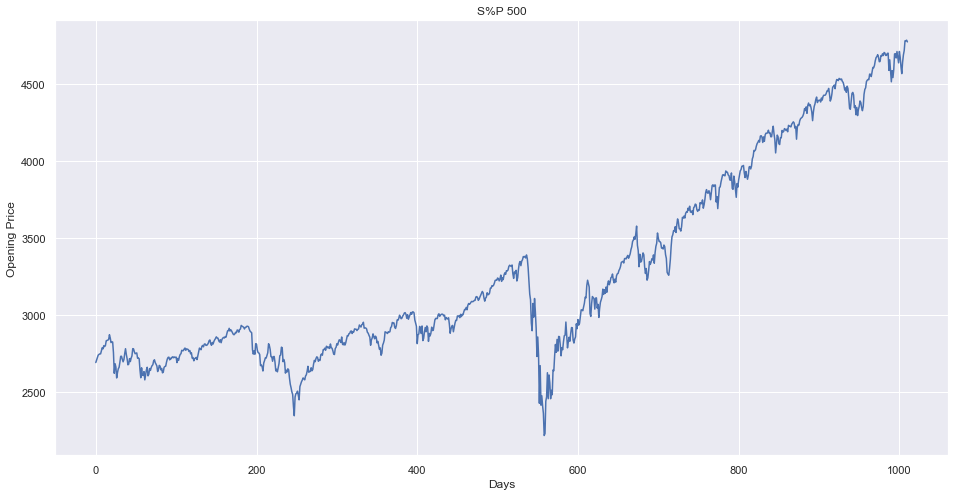

In [95]:
# visualizing the opening prices
plt.figure(figsize=(16,8))
plt.title('S%P 500')
plt.xlabel('Days')
plt.ylabel('Opening Price')
plt.plot(df['Open'])
plt.show()

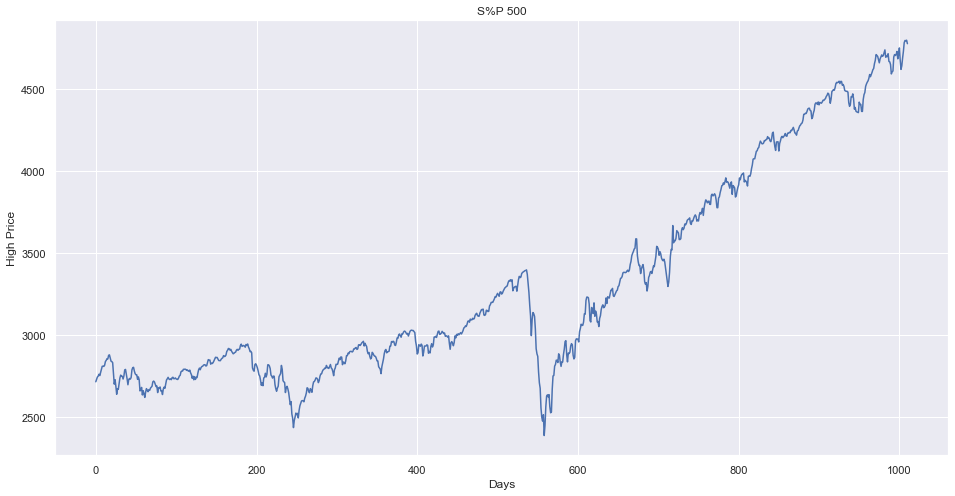

In [96]:
# visualizing the High prices
plt.figure(figsize=(16,8))
plt.title('S%P 500')
plt.xlabel('Days')
plt.ylabel('High Price')
plt.plot(df.High)
plt.show()

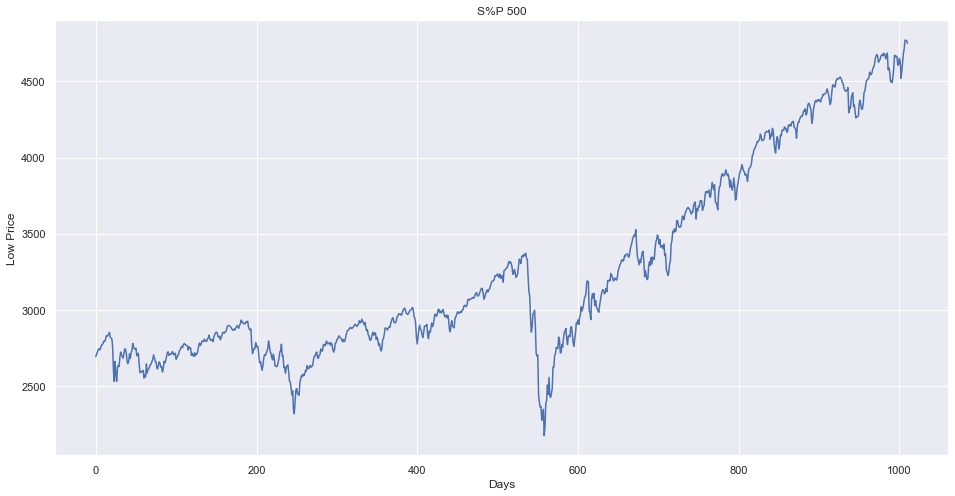

In [97]:
# visualizing the Low prices
plt.figure(figsize=(16,8))
plt.title('S%P 500')
plt.xlabel('Days')
plt.ylabel('Low Price')
plt.plot(df.Low)
plt.show()

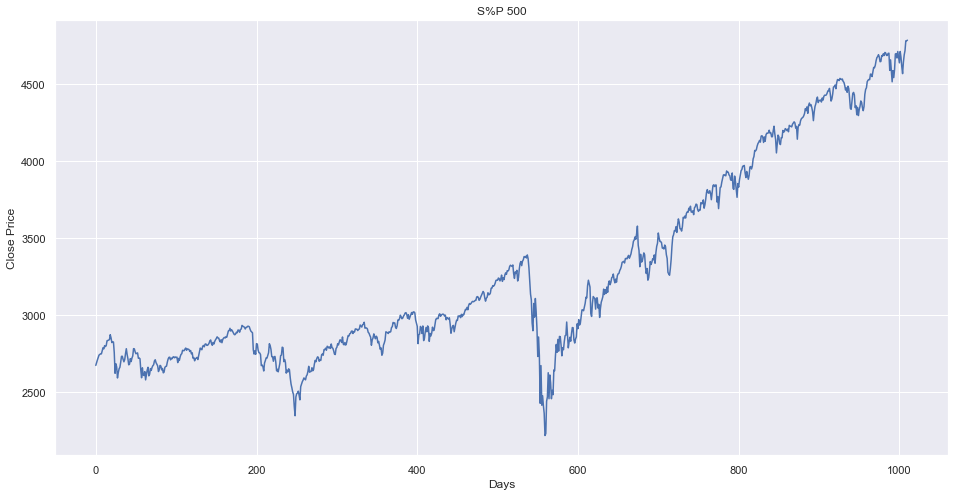

In [98]:
# visualizing the Close prices
plt.figure(figsize=(16,8))
plt.title('S%P 500')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df.Close)
plt.show()

Yearly Growth

In [99]:
year_group = df.groupby(df.Date.dt.year).mean()
year_group

,Price,Open,High,Low,Vol.,Change %,Close
Date,,,,,,,
2018,2747.59,2747.92,2766.23,2726.85,12640015.94,-0.00,2748.64
2019,2914.45,2910.70,2927.87,2895.06,12204972.22,0.00,2907.81
2020,3213.07,3208.70,3245.98,3172.16,6341261.90,0.00,3206.71
2021,4270.78,4267.25,4292.91,4241.79,15570011.72,0.00,4263.15


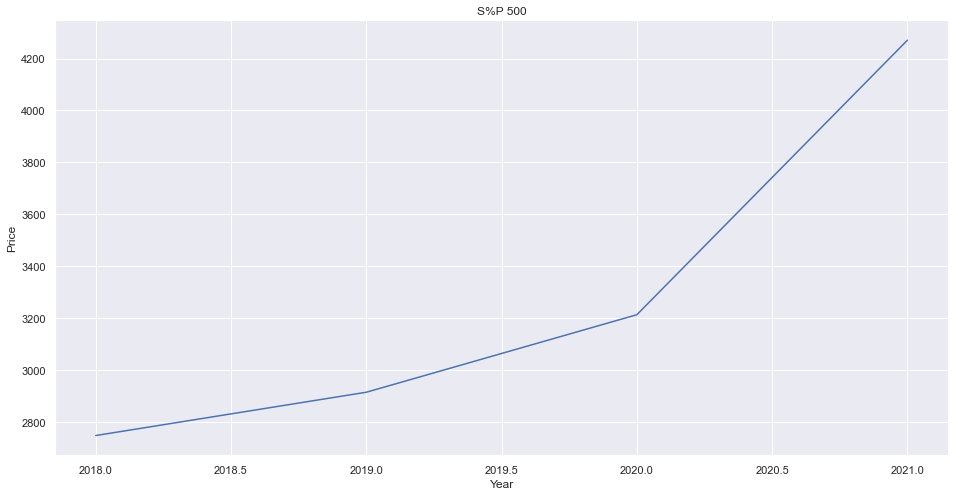

In [100]:
plt.figure(figsize=(16,8))
plt.title('S&P 500')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(year_group['Price'])
plt.show()

#--> S%P 500 perform well over all and there is a strong increase from 2022 to 2021

Monthly growth

In [101]:
month_group = df.groupby([df.Date.dt.month, df.Date.dt.year]).mean()
month_group.head()

Price    Open    High     Low       Vol.  Change %   Close
Date Date                                                             
1    2018 2795.69 2788.39 2804.64 2779.99 5864700.00      0.00 2780.99
     2019 2606.07 2595.55 2619.79 2578.19 1610476.19      0.00 2586.60
     2020 3278.57 3277.55 3293.68 3257.02 1759523.81     -0.00 3274.27
     2021 3786.49 3788.47 3815.29 3750.59 1588421.05     -0.00 3786.09
2    2018 2703.39 2710.29 2738.36 2670.37 2238421.05     -0.00 2714.33

In [102]:
monthly_dict = {
  2018: [],
  2019: [],
  2020: [],
  2021: [] 
  }
for index, row in month_group.iterrows():
  if index[1] in monthly_dict.keys():
    monthly_dict[index[1]].append(row['Price'])
  else:
    monthly_dict[index[1]] = [row['Price']]

[2795.6875, 2703.3947368421054, 2704.491904761905, 2654.5476190476193, 2700.5227272727275, 2756.290476190476, 2794.5833333333335, 2858.771739130435, 2904.707894736842, 2789.391304347826, 2724.214285714286, 2577.0325000000003]


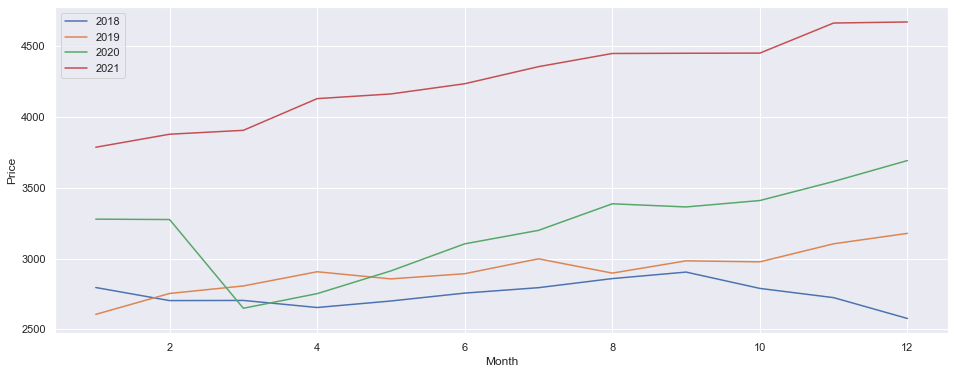

In [103]:
plt.figure(figsize=(16,8))
plt.title('S&P 500')
plt.xlabel('Month')
plt.ylabel('Price')
plt.plot(range(1, len(monthly_dict[2018]) + 1), monthly_dict[2018])
plt.plot(range(1, len(monthly_dict[2019]) + 1), monthly_dict[2019])
plt.plot(range(1, len(monthly_dict[2020]) + 1), monthly_dict[2020])
plt.plot(range(1, len(monthly_dict[2021]) + 1), monthly_dict[2021])
plt.legend(['2018', '2019', '2020', '2021'])
plt.show()

# --> There is a large dip from February to March 2022
# --> Overall the S&P 500 perform very well from 2019 to 2021

Exploring Volume

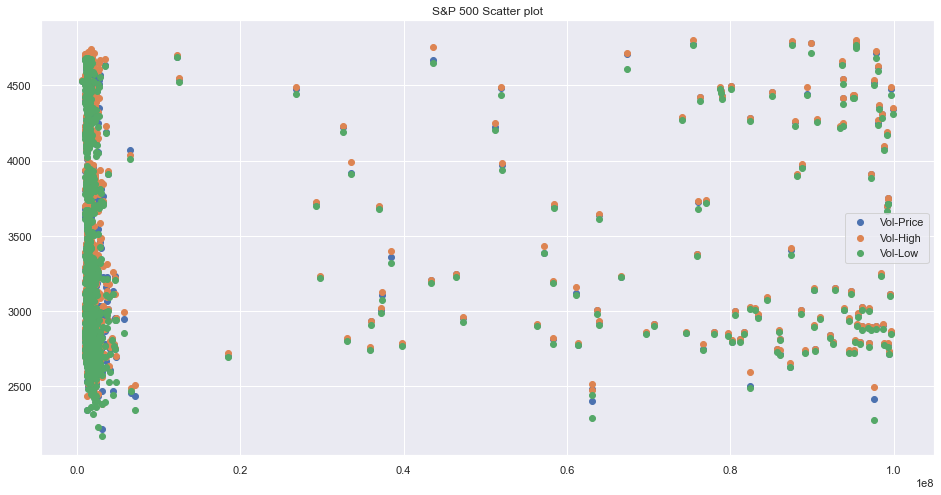

In [118]:
plt.figure(figsize=(16,8))
plt.title('S&P 500 Scatter plot')
plt.scatter(df['Vol.'], df.Price)
plt.scatter(df['Vol.'], df.High)
plt.scatter(df['Vol.'], df.Low)
plt.legend(['Vol-Price', 'Vol-High', 'Vol-Low'])
plt.show()

# --> There are no relationship between Vol with Price, High, and Low

Correlation plot for Price, Openning Price, Volume

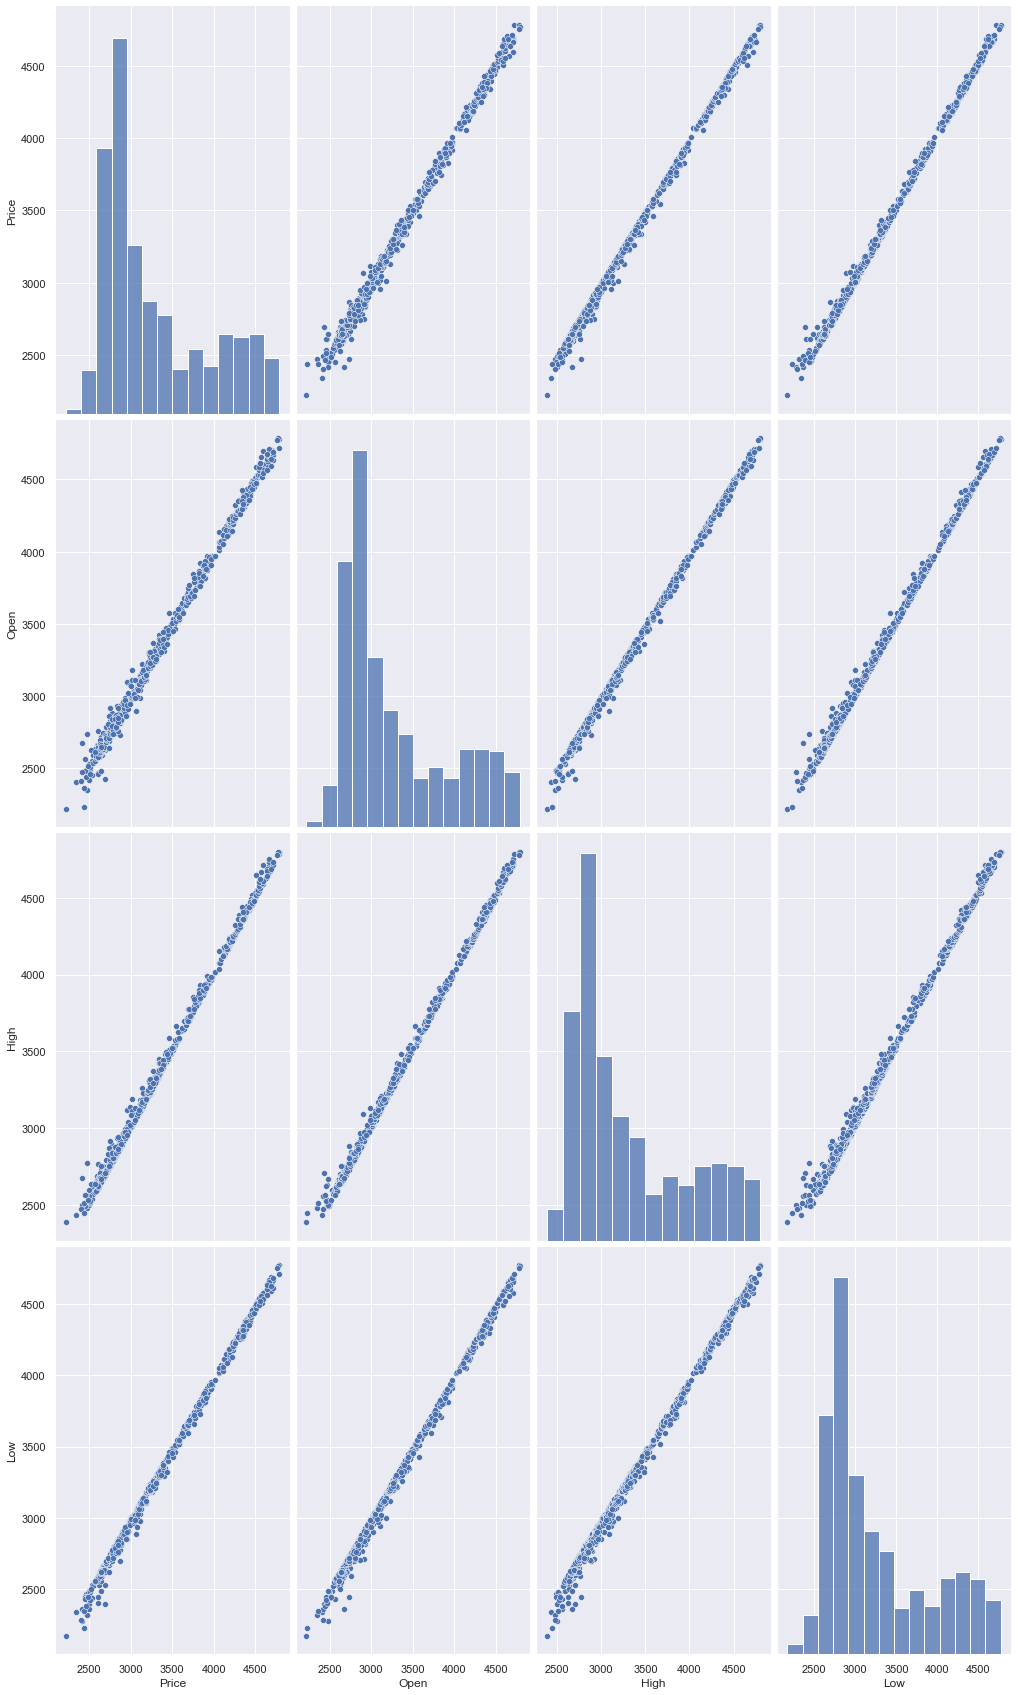

In [122]:
sns.set(font_scale=1)
sns.pairplot(df[['Price','Open', 'High', 'Low']], height=6, aspect=0.6)

# --> there are strong correlation between Price, Open, High, and Low
# --> I think there is something wrong ~~